In [ ]:
# Capstone Project: Student Success & Career Path Prediction

# Scenario

# The university wants to analyze student performance data to:

#     Predict exam scores (Regression).
#     Classify students into “At Risk” vs. “On Track” categories (Classification).
#     Cluster students into groups with similar study habits (Clustering).
#     Recommend interventions (extra tutoring, workshops, counseling).

  Student_ID  Hours_Studied  Attendance (%)  Assignments_Submitted  \
0       S001             10              85                      8   
1       S002              5              60                      5   
2       S003             12              90                      9   
3       S004              3              40                      3   
4       S005              8              75                      7   

   Previous_Sem_GPA  Participation_Score  Final_Exam_Score Pass_Fail  \
0               3.2                   70                78      Pass   
1               2.5                   55                55      Fail   
2               3.8                   80                88      Pass   
3               2.0                   45                45      Fail   
4               3.0                   65                70      Pass   

   Career_Readiness_Score  Age  Gender  
0                      65   20  Female  
1                      40   21    Male  
2                      

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


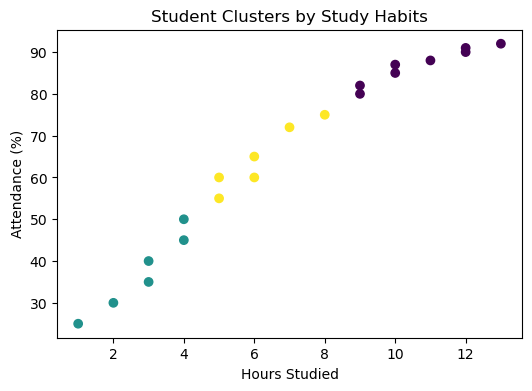


INTERVENTION SUGGESTIONS

Cluster 0
Average Exam Score: 81.88
→ Recommend: Career guidance + advanced courses

Cluster 1
Average Exam Score: 43.33
→ Recommend: Extra tutoring + counseling

Cluster 2
Average Exam Score: 60.5
→ Recommend: Skill workshops + mentoring


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, classification_report

df = pd.read_csv("Student_Success_Career_Path.csv")
print(df.head())
print(df.columns)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

X_reg = df[['Hours_Studied', 'Attendance (%)', 'Assignments_Submitted',
            'Previous_Sem_GPA', 'Participation_Score']]
y_reg = df['Final_Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

X_clf = df[['Hours_Studied', 'Attendance (%)', 'Assignments_Submitted',
            'Previous_Sem_GPA', 'Participation_Score']]
y_clf = df['Pass_Fail']

scaler = StandardScaler()
X_clf_scaled = scaler.fit_transform(X_clf)

X_train, X_test, y_train, y_test = train_test_split(
    X_clf_scaled, y_clf, test_size=0.3, random_state=42
)

clf_model = LogisticRegression()
clf_model.fit(X_train, y_train)

y_pred = clf_model.predict(X_test)

print(classification_report(y_test, y_pred))

X_cluster = df[['Hours_Studied', 'Attendance (%)', 'Assignments_Submitted',
                'Participation_Score']]

X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

print("\nCLUSTER COUNTS")
print(df['Cluster'].value_counts())

plt.figure(figsize=(6,4))
plt.scatter(df['Hours_Studied'], df['Attendance (%)'], c=df['Cluster'])
plt.xlabel("Hours Studied")
plt.ylabel("Attendance (%)")
plt.title("Student Clusters by Study Habits")
plt.show()

print("\nINTERVENTION SUGGESTIONS")

for i in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == i]
    avg_score = cluster_data['Final_Exam_Score'].mean()
    
    print(f"\nCluster {i}")
    print("Average Exam Score:", round(avg_score,2))
    
    if avg_score < 50:
        print("→ Recommend: Extra tutoring + counseling")
    elif avg_score < 70:
        print("→ Recommend: Skill workshops + mentoring")
    else:
        print("→ Recommend: Career guidance + advanced courses")